## Homegate Analysis

In [170]:
# Preliminary
import pandas as pd
import os
import numpy as np
os.chdir('/Users/jindi/Documents/GitHub/pp4r_final_assignments') # change this to your path

In [171]:
# Read file
df = pd.read_csv('data/Homegate_data_cleaned.csv')
df.head()

,Net Rent (CHF),Additional Expenses (CHF),Gross Rent (CHF),Available Date,Property Type,Number of Rooms,Number of Toilets,Floor Level,Living Area (sq. m.),Year Built,...,Room Height (m.),Last Refurbishment Year,Number of Floors,Floor Space (sq. m.),Land Area (sq. m.),Number of Apartments,Property Volume (cubic m.),Street,Postcode,City
0,3015.0,380.0,3395.0,01.11.2023,Apartment,3.5,1.0,6.0,88.0,2015.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pfingstweidstrasse 106b,8005.0,Zürich
1,3050.0,400.0,3450.0,01.12.2023,Apartment,2.5,NaN,1.0,80.0,2017.0,...,2.5,NaN,NaN,NaN,NaN,NaN,NaN,Gläserenstrasse 14,8142.0,Uitikon Waldegg
2,2445.0,323.0,2768.0,Immediately,Apartment,4.5,NaN,4.0,100.0,NaN,...,NaN,2023.0,NaN,NaN,NaN,NaN,NaN,Sihlfeldstrasse 89,8004.0,Zürich
3,3235.0,260.0,3495.0,01.11.2023,Apartment,4.0,NaN,2.0,95.0,1921.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kreuzstrasse 6,8802.0,Kilchberg
4,NaN,NaN,NaN,01.10.2023,Apartment,4.5,NaN,24.0,127.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hagenholzstrasse,8050.0,Zürich


### Geographical Analysis 

Here we can map the listings we have to a map in Zurich? (since we do not have the geographical coordinates yet, we can just plot by postcode?)

### Plots

In the analysis below, I drop the listings with gross rent > 20000 (n = 2), since they seem to be outliers...

In [172]:
# print out the rows with gross rent > 20000
df[df['Gross Rent (CHF)'] > 20000]

,Net Rent (CHF),Additional Expenses (CHF),Gross Rent (CHF),Available Date,Property Type,Number of Rooms,Number of Toilets,Floor Level,Living Area (sq. m.),Year Built,...,Room Height (m.),Last Refurbishment Year,Number of Floors,Floor Space (sq. m.),Land Area (sq. m.),Number of Apartments,Property Volume (cubic m.),Street,Postcode,City
354,NaN,NaN,26565.0,By agreement,Duplex,6.5,NaN,5.0,515.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dianastrasse 5,8002.0,Zürich
368,NaN,NaN,50000.0,Immediately,Apartment,3.5,NaN,NaN,78.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
# drop if Gross Rent > 20000
df = df[df['Gross Rent (CHF)'] < 20000]

In [174]:
# create a column for price per square meter
df['Price per sqm'] = df['Gross Rent (CHF)'] / df['Living Area (sq. m.)']

In [175]:
df['Living Area (sq. m.)'].describe()

count    855.000000
mean      77.792982
std       45.756334
min        6.000000
25%       46.000000
50%       74.000000
75%      100.000000
max      480.000000
Name: Living Area (sq. m.), dtype: float64

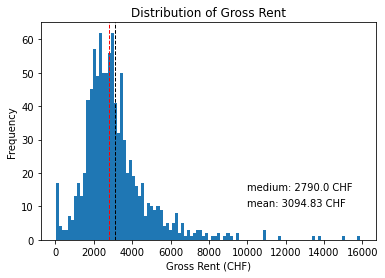

In [176]:
# plot the distribution of Gross Rent
import matplotlib.pyplot as plt
plt.hist(df['Gross Rent (CHF)'], bins = 100)  
plt.xlabel('Gross Rent (CHF)')
plt.ylabel('Frequency')
plt.title('Distribution of Gross Rent')
plt.axvline(df['Gross Rent (CHF)'].mean(), color='k', linestyle='dashed', linewidth=1) # add mean
# label the mean and medium line
plt.text(10000, 10, 'mean: ' + str(round(df['Gross Rent (CHF)'].mean(), 2)) + ' CHF')
plt.text(10000, 15, 'medium: ' + str(round(df['Gross Rent (CHF)'].median(), 2)) + ' CHF')
plt.axvline(df['Gross Rent (CHF)'].median(), color='r', linestyle='dashed', linewidth=1) # add median
plt.show()


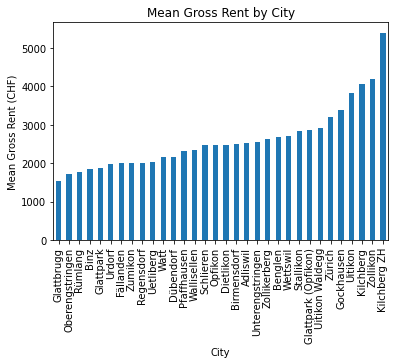

In [177]:
# plot the mean gross rent by city, in ascending order
df.groupby('City')['Gross Rent (CHF)'].mean().sort_values().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Mean Gross Rent (CHF)')
plt.title('Mean Gross Rent by City')
plt.show()

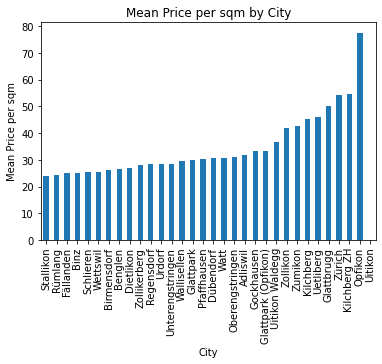

In [178]:
# plot the mean Price per sqm by city, in ascending order
df.groupby('City')['Price per sqm'].mean().sort_values().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Mean Price per sqm')
plt.title('Mean Price per sqm by City')
plt.show()

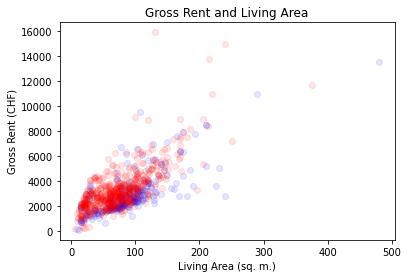

In [179]:
# create a scatter plot of Gross Rent and Living Area, make the observations in Zurich red, while others blue
plt.scatter(df[df['City'] != 'Zürich']['Living Area (sq. m.)'], df[df['City'] != 'Zürich']['Gross Rent (CHF)'], alpha=0.1, color='blue')
plt.scatter(df[df['City'] == 'Zürich']['Living Area (sq. m.)'], df[df['City'] == 'Zürich']['Gross Rent (CHF)'], alpha=0.1, color='red')

plt.xlabel('Living Area (sq. m.)')
plt.ylabel('Gross Rent (CHF)')
plt.title('Gross Rent and Living Area')
plt.show()

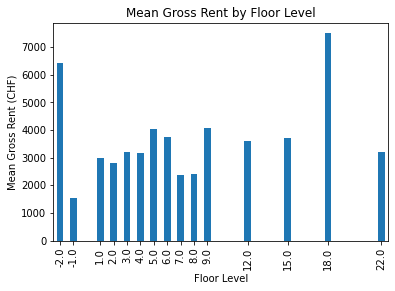

In [183]:
# create a bar plot of the floor level against the Gross rent
df.groupby('Floor Level')['Gross Rent (CHF)'].mean().plot(kind='bar')
plt.xlabel('Floor Level')
plt.ylabel('Mean Gross Rent (CHF)')
plt.title('Mean Gross Rent by Floor Level')
plt.show()





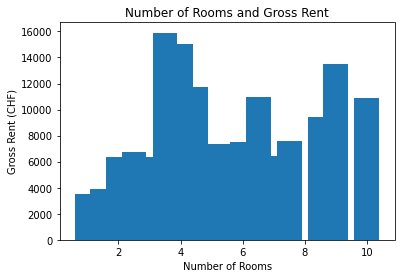

In [180]:
# create a bar plot of the Number of Rooms against the Gross Rent
plt.bar(df['Number of Rooms'], df['Gross Rent (CHF)'])
plt.xlabel('Number of Rooms')
plt.ylabel('Gross Rent (CHF)')
plt.title('Number of Rooms and Gross Rent')
plt.show()


### Regressions 

In [181]:
# ran a regression of Gross Rent on Living Area, Number of Rooms, and City, ignore the missing values
# add city dummies
df = pd.get_dummies(df, columns=['City'], drop_first=True)
df = pd.get_dummies(df, columns=['Postcode'], drop_first=True)

In [182]:


import statsmodels.api as sm
from stargazer.stargazer import Stargazer
model1 = sm.OLS(df['Gross Rent (CHF)'], sm.add_constant(df[['Living Area (sq. m.)', 'Number of Rooms', 'Floor Level', 'Year Built']]), missing='drop').fit()
model2 = sm.OLS(df['Gross Rent (CHF)'], sm.add_constant(df[['Living Area (sq. m.)', 'Number of Rooms', 'Floor Level', 'Year Built'] + list(df.columns[df.columns.str.startswith('City_')]) + list(df.columns[df.columns.str.startswith('Postcode_')])]), missing='drop').fit()

stargazer = Stargazer([model1, model2])
stargazer.title('Regression on Gross Rent')
stargazer.covariate_order(['Living Area (sq. m.)', 'Number of Rooms', 'Floor Level', 'Year Built'])
stargazer.dependent_variable_name('Dependent variable: Gross Rent (CHF)')

stargazer